# EDA

In [2]:
import joblib

In [3]:
data=joblib.load(r"C:\Users\sohaibkhan\Project1\Data\DataCleaning.pkl")

In [4]:
data.head(2)

,status,created_at,price,qty_ordered,category_name_1,discount_amount,payment_method,Working Date,Year,Month,year,month,dayofweek,is_weekend,quarter,discount_per_unit,is_discounted
0,complete,2016-07-01,7.576097,0.693147,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016.0,7.0,4.0,0,3.0,0.0,0
1,canceled,2016-07-01,5.484797,0.693147,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016.0,7.0,4.0,0,3.0,0.0,0


Initial shape: (584524, 17)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   status             584509 non-null  object        
 1   created_at         584524 non-null  datetime64[ns]
 2   price              584524 non-null  float64       
 3   qty_ordered        584524 non-null  float64       
 4   category_name_1    584524 non-null  object        
 5   discount_amount    584521 non-null  float64       
 6   payment_method     584524 non-null  object        
 7   Working Date       584524 non-null  datetime64[ns]
 8   Year               584524 non-null  float64       
 9   Month              584524 non-null  float64       
 10  year               584524 non-null  float64       
 11  month              584524 non-null  float64       
 12  dayofweek          584524 non-null  float64       
 13  is_weeke

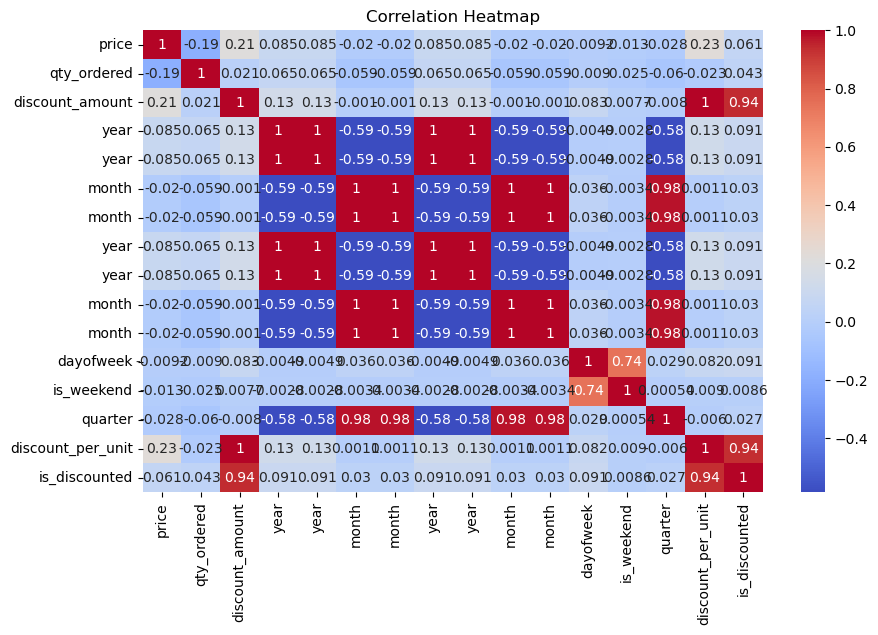

Shape after outlier removal: (339474, 17)


['C:/Users/sohaibkhan/Project1/Data/EDA.pkl']

In [5]:
# ==============================
# 1. Imports
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# ==============================
# 2. Load Data
# ==============================
# data = pd.read_csv("YourDataset.csv")  # Change to your file name

print("Initial shape:", data.shape)

# ==============================
# 3. Basic Info
# ==============================
print("\nBasic Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# ==============================
# 4. Remove duplicates
# ==============================
data.drop_duplicates(inplace=True)
print("\nShape after removing duplicates:", data.shape)

# ==============================
# 5. Clean column names
# ==============================
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")
# Removes spaces

# Converts names to lowercase

# Replaces spaces with underscores _

# Example: "Grand Total " → "grand_total"






# ==============================
# 6. Handle missing values
# ==============================
# Numerical: fill with median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].median())

# Categorical: fill with mode
for col in data.select_dtypes(exclude=[np.number]).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# ==============================
# 7. Correlation with target
# ==============================
numeric_cols = data.select_dtypes(include=[np.number]).columns
if "price" in numeric_cols:
    corr = data[numeric_cols].corr()["price"].sort_values(ascending=False)
    print("\nTop correlations with price:\n", corr.head(15))
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

# ==============================
# 8. Outlier Removal (IQR Method)
# ==============================
if "price" in data.columns:
    Q1 = data["price"].quantile(0.25)
    Q3 = data["price"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data["price"] >= lower_bound) & (data["price"] <= upper_bound)]
    print("Shape after outlier removal:", data.shape)

# ==============================
# 9. Encode Categorical Features
# ==============================

cat_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
if cat_cols:
    data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# ==============================
# 10. Fix Skewness for numeric features
# ==============================
# ==============================
# 10. Fix Skewness for numeric features
# ==============================
# ==============================
# from scipy.stats import skew
from scipy.stats import skew
import numpy as np

# ==============================
# 10. Fix Skewness for numeric features
# ==============================
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    if col != "price":
        col_values = data[col].to_numpy().flatten()  # 1D array
        # Ensure all values are non-negative before log transform
        if np.all(col_values >= 0):
            skew_value = skew(col_values)
            if abs(skew_value) > 1:
                data[col] = np.log1p(data[col])




# ==============================
# 11. Scaling (Optional but good for ML)
# ==============================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data[num_cols] = scaler.fit_transform(data[num_cols])

# ==============================
# 12. Save Clean Data
# ==============================
joblib.dump(data,"C:/Users/sohaibkhan/Project1/Data/EDA.pkl")




In [6]:
print("Training features:", list(data.columns))


Training features: ['price', 'qty_ordered', 'discount_amount', 'year', 'month', 'year', 'month', 'dayofweek', 'is_weekend', 'quarter', 'discount_per_unit', 'is_discounted', 'status_canceled', 'status_closed', 'status_cod', 'status_complete', 'status_exchange', 'status_fraud', 'status_holded', 'status_order_refunded', 'status_paid', 'status_payment_review', 'status_pending', 'status_pending_paypal', 'status_processing', 'status_received', 'status_refund', 'created_at_2016-07-02 00:00:00', 'created_at_2016-07-03 00:00:00', 'created_at_2016-07-04 00:00:00', 'created_at_2016-07-05 00:00:00', 'created_at_2016-07-06 00:00:00', 'created_at_2016-07-07 00:00:00', 'created_at_2016-07-08 00:00:00', 'created_at_2016-07-09 00:00:00', 'created_at_2016-07-10 00:00:00', 'created_at_2016-07-11 00:00:00', 'created_at_2016-07-12 00:00:00', 'created_at_2016-07-13 00:00:00', 'created_at_2016-07-14 00:00:00', 'created_at_2016-07-15 00:00:00', 'created_at_2016-07-16 00:00:00', 'created_at_2016-07-17 00:00:00